In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
import gc
import sys
import json
import random
from pathlib import Path

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train.csv')


In [4]:
with open('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)
sample_sub_df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/sample_submission.csv')


In [5]:
categories_df = pd.DataFrame(label_desc['categories'])
attributes_df = pd.DataFrame(label_desc['attributes'])
categories_df

id                                     name   supercategory  level
0    0                            shirt, blouse       upperbody      2
1    1                 top, t-shirt, sweatshirt       upperbody      2
2    2                                  sweater       upperbody      2
3    3                                 cardigan       upperbody      2
4    4                                   jacket       upperbody      2
5    5                                     vest       upperbody      2
6    6                                    pants       lowerbody      2
7    7                                   shorts       lowerbody      2
8    8                                    skirt       lowerbody      2
9    9                                     coat       wholebody      2
10  10                                    dress       wholebody      2
11  11                                 jumpsuit       wholebody      2
12  12                                     cape       wholebody      2
13  13                                  glasses            head      2
14  14                                      hat            head      2
15  15  headband, head covering, hair accessory            head      2
16  16                                      tie            neck      2
17  17                                    glove  arms and hands      2
18  18                                    watch  arms and hands      2
19  19                                     belt           waist      2
20  20                               leg warmer   legs and feet      2
21  21                        tights, stockings   legs and feet      2
22  22                                     sock   legs and feet      2
23  23                                     shoe   legs and feet      2
24  24                              bag, wallet          others      2
25  25                                    scarf          others      2
26  26                                 umbrella          others      2
27  27                                     hood   garment parts      2
28  28                                   collar   garment parts      2
29  29                                    lapel   garment parts      2
30  30                                epaulette   garment parts      2
31  31                                   sleeve   garment parts      2
32  32                                   pocket   garment parts      2
33  33                                 neckline   garment parts      2
34  34                                   buckle        closures      2
35  35                                   zipper        closures      2
36  36                                 applique     decorations      2
37  37                                     bead     decorations      2
38  38                                      bow     decorations      2
39  39                                   flower     decorations      2
40  40                                   fringe     decorations      2
41  41                                   ribbon     decorations      2
42  42                                    rivet     decorations      2
43  43                                   ruffle     decorations      2
44  44                                   sequin     decorations      2
45  45                                   tassel     decorations      2

In [6]:
df.head()

ImageId  \
0  00000663ed1ff0c4e0132b9b9ac53f6e   
1  00000663ed1ff0c4e0132b9b9ac53f6e   
2  00000663ed1ff0c4e0132b9b9ac53f6e   
3  00000663ed1ff0c4e0132b9b9ac53f6e   
4  00000663ed1ff0c4e0132b9b9ac53f6e   

                                       EncodedPixels  Height  Width  ClassId  \
0  6068157 7 6073371 20 6078584 34 6083797 48 608...    5214   3676        6   
1  6323163 11 6328356 32 6333549 53 6338742 75 63...    5214   3676        0   
2  8521389 10 8526585 30 8531789 42 8537002 46 85...    5214   3676       28   
3  12903854 2 12909064 7 12914275 10 12919485 15 ...    5214   3676       31   
4  10837337 5 10842542 14 10847746 24 10852951 33...    5214   3676       32   

                     AttributesIds  
0  115,136,143,154,230,295,316,317  
1  115,136,142,146,225,295,316,317  
2                              163  
3                          160,204  
4                              219

In [7]:
image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))
image_df.reset_index(inplace=True)
image_df['ImageId'] = image_df['ImageId'].astype('str')

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_23079/700136001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))


In [8]:
names = ["shirt, blouse","top, t-shirt, sweatshirt","sweater","cardigan",
"jacket","vest","pants","shorts","skirt","coat","dress","jumpsuit","cape",
"glasses","hat","headband, head covering, hair accessory","tie","glove",
"watch","belt","leg warmer","tights, stockings","sock","shoe","bag, wallet",
"scarf","umbrella","hood","collar","lapel","epaulette","sleeve","pocket","neckline",
"buckle","zipper","applique","bead","bow","flower","fringe","ribbon","rivet","ruffle",
"sequin","tassel"]

In [9]:
set_cls= []
for i in range(len(image_df)):
    classes = list(set(image_df['ClassId'].iloc[i]))
    set_cls.append(classes)
    
image_df['SetClassId'] = set_cls
image_df.drop(['AttributesIds','ClassId'],axis=1,inplace=True)

In [10]:
image_df.head()

ImageId                 SetClassId
0  00000663ed1ff0c4e0132b9b9ac53f6e  [0, 32, 4, 6, 28, 29, 31]
1  0000fe7c9191fba733c8a69cfaf962b7                    [33, 1]
2  0002ec21ddb8477e98b2cbb87ea2e269               [33, 10, 23]
3  0002f5a0ebc162ecfb73e2c91e3b8f62               [33, 10, 15]
4  0004467156e47b0eb6de4aa6479cbd15           [33, 10, 15, 31]

In [11]:
indices = []

# Loop through the rows of the DataFrame
for i in range(len(image_df)):
    if len(image_df.SetClassId.iloc[i]) == 1:
        indices.append(i)

print(len(indices))

317


In [12]:
# Define the numbers to search for
#search_numbers = [9, 10, 11, 12]
search_numbers = [10]

# Create a boolean mask indicating which rows contain the specified numbers
mask = image_df['SetClassId'].apply(lambda x: any([num in x for num in search_numbers]))

# Filter the DataFrame based on the mask
filtered_df = image_df[mask]
other_df = image_df[~mask]


**************************************************


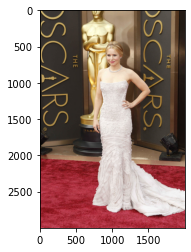

[0] neckline 
[1] dress 
**************************************************
**************************************************


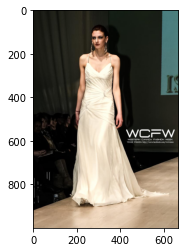

[0] neckline 
[1] dress 
**************************************************
**************************************************


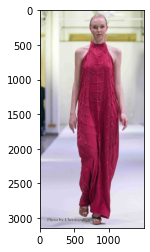

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


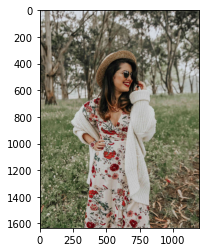

[0] neckline 
[1] cardigan 
[2] dress 
[3] glasses 
[4] hat 
[5] watch 
[6] sleeve 
**************************************************
**************************************************


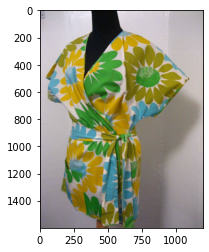

[0] pocket 
[1] neckline 
[2] dress 
[3] belt 
[4] sleeve 
**************************************************


In [13]:
for i in range(5):
    x = np.random.randint(0,len(filtered_df),size=(1,))[0]
    ID = filtered_df['ImageId'].iloc[x]
    classes = filtered_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)
    

**************************************************


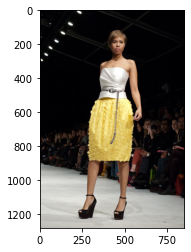

[0] neckline 
[1] top, t-shirt, sweatshirt 
[2] skirt 
[3] belt 
[4] shoe 
**************************************************
**************************************************


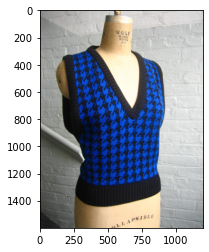

[0] neckline 
[1] vest 
**************************************************
**************************************************


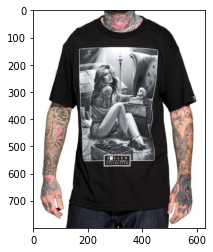

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] applique 
[3] sleeve 
**************************************************
**************************************************


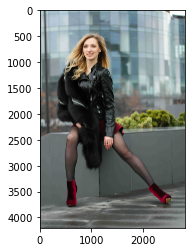

[0] zipper 
[1] jacket 
[2] skirt 
[3] tights, stockings 
[4] shoe 
[5] collar 
[6] lapel 
[7] sleeve 
**************************************************
**************************************************


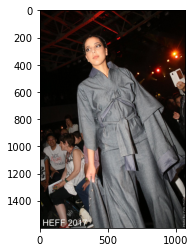

[0] jacket 
[1] jumpsuit 
[2] belt 
[3] collar 
[4] sleeve 
**************************************************


In [14]:
for i in range(5):
    x = np.random.randint(0,len(other_df),size=(1,))[0]
    ID = other_df['ImageId'].iloc[x]
    classes = other_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)

# Adding Class Column

Dress = 1 and Non-Dress = 0

In [15]:
filtered_df["Class"]=1
other_df["Class"]=0

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_23079/4009865848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Class"]=1
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_23079/4009865848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df["Class"]=0


Choose a Sample of 10,000 row data

In [105]:
Sample_One=filtered_df.sample(n=5000, random_state=1)
Sample_Zero=other_df.sample(n=5000, random_state=1)

In [106]:
# Join the two DataFrames based on the 'ImageId' column
merged_df = pd.concat([Sample_One, Sample_Zero], sort=False)

# Print the merged DataFrame
merged_df

ImageId  \
23901  85e8704c1a884af54504c7b5ece67dd7   
25944  91a36a8a6a9d6b5d6caebb12ebcb2c1d   
14207  4f423230aeee6d70264a5f0eecd2b0c9   
24037  86ad840a18878cc3c98900e7069185a1   
30219  a9311f428f647d69230d41577f3a762b   
...                                 ...   
34209  bfe429acd9c4fcb81d92a0e12567103d   
7039   272c398f340d217c886e8448ff43b1e1   
10783  3c3d5640ec24a117e433781a2461b804   
6891   26640ed90fbd5888f2dde83052d4cd23   
9924   378a8885bb1f4c6e2e4a2911ee5086b3   

                                  SetClassId  Class  
23901                           [33, 10, 23]      1  
25944                   [33, 10, 13, 23, 31]      1  
14207                           [33, 10, 19]      1  
24037                   [33, 10, 21, 23, 31]      1  
30219                               [33, 10]      1  
...                                      ...    ...  
34209                         [1, 31, 6, 33]      0  
7039                     [33, 1, 11, 15, 31]      0  
10783                         [0, 23, 29, 7]      0  
6891   [32, 1, 33, 4, 6, 13, 14, 23, 29, 31]      0  
9924                             [1, 31, 33]      0  

[10000 rows x 3 columns]

In [107]:
from sklearn.model_selection import train_test_split

In [121]:
y_tc, y_test = train_test_split(merged_df, test_size=0.2, random_state=42)
y_train, y_cv = train_test_split(y_tc, test_size=0.25, random_state=42)

In [122]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_cv = y_cv.reset_index(drop=True)


In [123]:
Ratio=pd.DataFrame((df.Height)/(df.Width))
np.mean(Ratio)

w_num_px=64
h_num_px=int(round(np.mean(Ratio)*w_num_px))

h_num_px

88

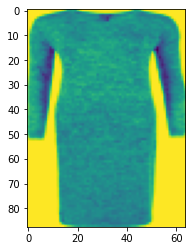

In [124]:
ID="9b541f60dae448f8f1a9c29923c2d077"
plt.imshow(Image.open(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg').resize((w_num_px, h_num_px)))


In [125]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_test = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_test = y_test.copy()
Drop_ID_test=[]


for ID in y_test["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_test = np.append(X_test, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_test.append(ID)
        #Y_test.drop(Y_test[Y_test["ImageID"] == ID].index, inplace=True)


Error loading image 9b541f60dae448f8f1a9c29923c2d077: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 8f2c6a6526e4abd6df89f9dd765ca229: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 1b54ff04705d6da0e3dc06a496a0e165: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 5d189f285cbf9a1486b194981ffa51dd: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image b9ccf0f2032d9ce6ce01b221bf0fbe11: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)


In [127]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_train = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_train = y_train.copy()
Drop_ID_train=[]

for ID in y_train["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_train = np.append(X_train, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_train.append(ID)
        #y_train.drop(y_train[y_train['ImageID'] == ID].index, inplace=True)
        

Error loading image af211d9f824b68b739eb8212620e6010: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 2ecb189c6d816c6ddcffba959163f7cd: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 010b56cf612e31e9b2f1321dbb655fc2: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 00c344097e4bb8031790989c21ae6fe7: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 2ba69a4e9de0cdf1caa419b8c2338461: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)


In [128]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_cv = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_cv = y_cv.copy()
Drop_ID_cv=[]

for ID in y_cv["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_cv = np.append(X_cv, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_cv.append(ID)
        #y_cv.drop(y_cv[y_cv['ImageID'] == ID].index, inplace=True)
        

Error loading image 307aba17bfc9a40b9f15453e1c613815: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 94b357abf2a45614ce99fe0ff30ad84d: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 3d8aa95253a15f64b297be8b92357e26: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 85f9da5d7595227361f5e056d8413e34: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)


In [154]:
for ID in Drop_ID_test:
    Y_test.drop(Y_test[Y_test["ImageId"] == ID].index, inplace=True)

for ID in Drop_ID_train:
    Y_train.drop(Y_train[Y_train['ImageId'] == ID].index, inplace=True)

for ID in Drop_ID_cv:
    Y_cv.drop(Y_cv[Y_cv['ImageId'] == ID].index, inplace=True)

train_set_y=np.array(Y_train["Class"])
test_set_y=np.array(Y_test["Class"])
cv_set_y=np.array(Y_cv["Class"])

In [160]:
train_set_y.shape

(5977,)

In [158]:
train_set_x_flatten.shape

(16896, 5977)

In [132]:
train_set_x_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_x_flatten = X_test.reshape(X_test.shape[0], -1).T
cv_set_x_flatten = X_cv.reshape(X_cv.shape[0], -1).T

In [134]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
cv_set_x = cv_set_x_flatten/255.

# Model

In [136]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [137]:
#example
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [138]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [139]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                    
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                                 
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    Dw = (1/m)*np.dot(X, (A-Y).T)
    Db = (1/m)*np.sum(A-Y)

    assert(Dw.shape == w.shape)
    assert(Db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return grads, cost

In [140]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("Dw = " + str(grads["Dw"]))
print ("Db = " + str(grads["Db"]))
print ("cost = " + str(cost))

Dw = [[0.99845601]
 [2.39507239]]
Db = 0.001455578136784208
cost = 5.801545319394553


In [141]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        
        # Retrieve derivatives from grads
        Dw = grads["Dw"]
        Db = grads["Db"]
        
        # update rule 
        w = w - learning_rate *Dw
        b = b - learning_rate *Db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return params, grads, costs

In [142]:
# example
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("Dw = " + str(grads["Dw"]))
print ("Db = " + str(grads["Db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
Dw = [[0.67752042]
 [1.41625495]]
Db = 0.21919450454067652


In [143]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b) 
        
    for i in range(A.shape[1]):  
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] <= 0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
            
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [144]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [145]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [161]:
d = model(train_set_x, train_set_y, 
          test_set_x, test_set_y, num_iterations = 2000, 
          learning_rate = 0.005, print_cost = True)


train accuracy: 54.994144219508115 %
test accuracy: 54.947262682069315 %
